In [6]:
# import the necessary library 
# If you need any other library, you can write the import function here
!pip install xgboost


In [7]:
import numpy as np 
import pandas as pd 
        
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/Mathuran-Mang/NBA-MVP-Prediction-Model/main/player_stats.csv')
data


# Data Preprocessing,  Visualization of preprocessing, Data Quality Report

In [9]:
data = data.drop(['Rank', 'Age', 'Tm', 'First', 'Pts Won', 'WS/48', 'WS'], axis = 1)


### Data Quality

In [62]:
data.isna().sum()

Player                           0
Pts Max                          0
Share                            0
G                                0
MP                               0
PTS                              0
TRB                              0
AST                              0
STL                              0
BLK                              0
FG%                              0
3P%                              0
FT%                              0
year                             0
team                             0
W                                0
W/L%                             0
seed                             0
player_efficiency_rating         0
true_shooting_percentage         0
three_point_attempt_rate         0
free_throw_attempt_rate          0
offensive_rebound_percentage     0
defensive_rebound_percentage     0
total_rebound_percentage         0
assist_percentage                0
steal_percentage                 0
block_percentage                 0
turnover_percentage 

#### As we can see there are no NaN values 

Training on everything until 2020 and testing on 2021 data


In [10]:
train_data = data[data['year']<=2020]
test_data = data[data['year']>=2021]

In [11]:
train_data_1980 = train_data.copy()
train_data_2000 =train_data[train_data['year']>=2000]
train_data_2010 =train_data[train_data['year']>=2010]

###### Data From 1980 -2021

In [57]:
train_data_1980

,Player,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,Kareem Abdul-Jabbar,221,0.665,82,38.3,24.8,10.8,4.5,1.0,3.4,...,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3
1,Julius Erving,221,0.143,78,36.1,26.9,7.4,4.6,2.2,1.8,...,13.3,30.3,7.3,5.2,12.5,0.213,5.7,1.9,7.6,6.8
2,George Gervin,221,0.086,78,37.6,33.1,5.2,2.6,1.4,1.0,...,10.3,31.7,9.3,1.3,10.6,0.173,5.5,-1.6,3.9,4.4
3,Larry Bird,221,0.068,82,36.0,21.3,10.4,4.5,1.7,0.6,...,14.0,25.3,5.6,5.6,11.2,0.182,3.0,1.5,4.5,4.8
4,Tiny Archibald,221,0.009,80,35.8,14.1,2.5,8.4,1.3,0.1,...,19.7,17.0,5.9,2.9,8.9,0.148,1.4,-0.3,1.1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Damian Lillard,1010,0.023,66,37.5,30.0,4.3,8.0,1.1,0.3,...,11.0,30.3,10.9,0.7,11.6,0.225,8.3,-0.9,7.5,5.9
662,Nikola Jokić,1010,0.018,73,32.0,19.9,9.7,7.0,1.2,0.6,...,15.8,26.6,6.7,3.1,9.8,0.202,5.5,2.0,7.4,5.5
663,Pascal Siakam,1010,0.017,60,35.2,22.9,7.3,3.5,1.0,0.9,...,10.7,28.1,1.8,3.6,5.4,0.123,1.3,0.5,1.8,2.0
664,Jimmy Butler,1010,0.009,58,33.8,19.9,6.7,6.0,1.8,0.6,...,11.4,25.1,6.3,2.7,9.0,0.221,4.0,1.5,5.4,3.7


###### Data From 2000 -2021

In [59]:
train_data_2000

,Player,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
370,Shaquille O'Neal,1210,0.998,79,40.0,29.7,13.6,3.8,0.5,3.0,...,9.9,31.2,11.7,7.0,18.6,0.283,7.3,2.0,9.3,9.0
371,Kevin Garnett,1210,0.337,81,40.0,22.9,11.8,5.0,1.5,1.6,...,13.6,27.4,6.1,5.6,11.6,0.172,4.6,1.7,6.3,6.8
372,Alonzo Mourning,1210,0.303,79,34.8,21.7,9.5,1.6,0.5,3.7,...,13.1,28.1,7.3,5.6,12.9,0.226,3.1,2.2,5.3,5.0
373,Karl Malone,1210,0.258,82,35.9,25.5,9.5,3.7,1.0,0.9,...,11.4,31.9,10.7,4.5,15.3,0.249,6.4,1.1,7.5,7.1
374,Tim Duncan,1210,0.205,74,38.9,23.2,12.4,3.2,0.9,2.2,...,13.5,28.7,6.7,6.4,13.0,0.218,3.8,1.8,5.6,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Damian Lillard,1010,0.023,66,37.5,30.0,4.3,8.0,1.1,0.3,...,11.0,30.3,10.9,0.7,11.6,0.225,8.3,-0.9,7.5,5.9
662,Nikola Jokić,1010,0.018,73,32.0,19.9,9.7,7.0,1.2,0.6,...,15.8,26.6,6.7,3.1,9.8,0.202,5.5,2.0,7.4,5.5
663,Pascal Siakam,1010,0.017,60,35.2,22.9,7.3,3.5,1.0,0.9,...,10.7,28.1,1.8,3.6,5.4,0.123,1.3,0.5,1.8,2.0
664,Jimmy Butler,1010,0.009,58,33.8,19.9,6.7,6.0,1.8,0.6,...,11.4,25.1,6.3,2.7,9.0,0.221,4.0,1.5,5.4,3.7


###### Data From 2010 -2021


In [60]:
train_data_2010

,Player,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
521,LeBron James,1230,0.980,76,39.0,29.7,7.3,8.6,1.6,1.0,...,12.3,33.5,13.3,5.2,18.5,0.299,9.1,2.8,11.8,10.3
522,Kevin Durant,1230,0.495,82,39.5,30.1,7.6,2.8,1.4,1.0,...,11.7,32.0,11.1,5.0,16.1,0.238,6.3,0.8,7.1,7.5
523,Kobe Bryant,1230,0.487,73,38.8,27.0,5.4,5.0,1.5,0.3,...,11.4,32.3,5.4,4.0,9.4,0.160,3.9,0.2,4.1,4.4
524,Dwight Howard,1230,0.389,82,34.7,18.3,13.2,1.8,0.9,2.8,...,18.7,23.9,6.1,7.1,13.2,0.223,1.6,2.8,4.4,4.6
525,Dwyane Wade,1230,0.097,77,36.3,26.6,4.8,6.5,1.8,1.1,...,12.2,34.9,8.5,4.6,13.0,0.224,7.1,2.1,9.2,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Damian Lillard,1010,0.023,66,37.5,30.0,4.3,8.0,1.1,0.3,...,11.0,30.3,10.9,0.7,11.6,0.225,8.3,-0.9,7.5,5.9
662,Nikola Jokić,1010,0.018,73,32.0,19.9,9.7,7.0,1.2,0.6,...,15.8,26.6,6.7,3.1,9.8,0.202,5.5,2.0,7.4,5.5
663,Pascal Siakam,1010,0.017,60,35.2,22.9,7.3,3.5,1.0,0.9,...,10.7,28.1,1.8,3.6,5.4,0.123,1.3,0.5,1.8,2.0
664,Jimmy Butler,1010,0.009,58,33.8,19.9,6.7,6.0,1.8,0.6,...,11.4,25.1,6.3,2.7,9.0,0.221,4.0,1.5,5.4,3.7


Correlation matrix for all data

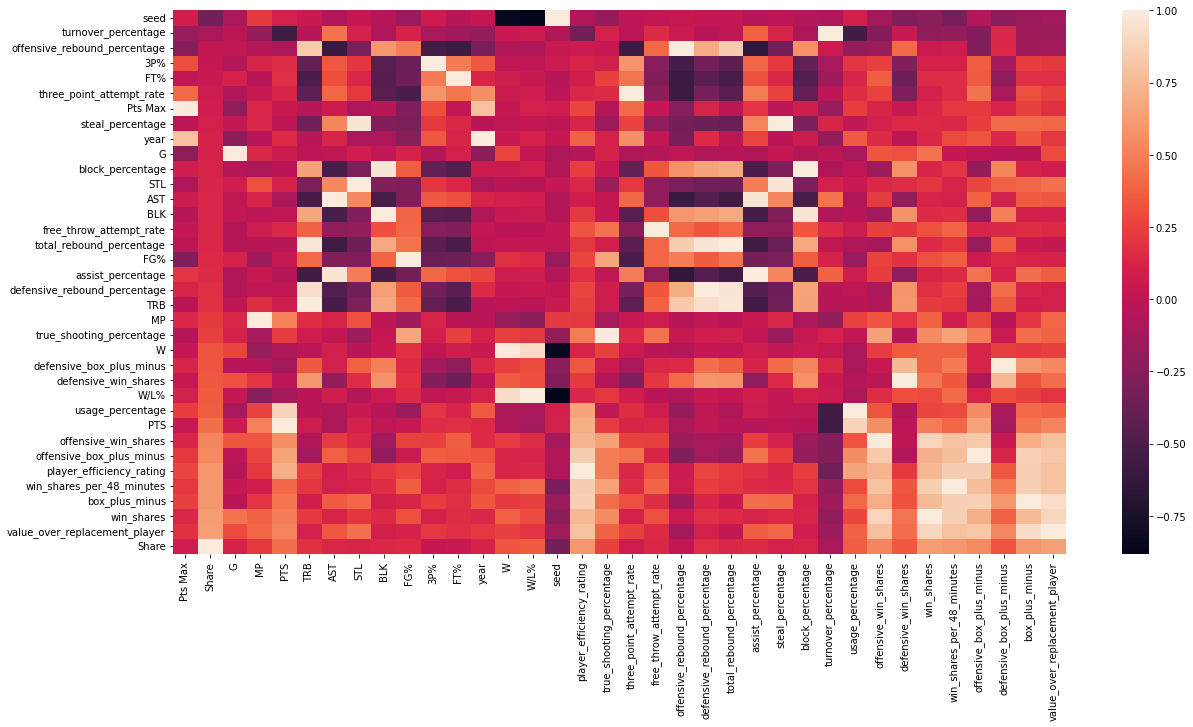

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(train_data_1980.corr().sort_values(by='Share',ascending=True));

After trying different number of features and analyzing their correlation values, having the top 11 features seem to be giving us the best results.


In [15]:
top_corr_1980 = train_data_1980.corr()["Share"].abs().sort_values(ascending = False)
top_corr_2000 = train_data_2000.corr()["Share"].abs().sort_values(ascending = False)
top_corr_2010 = train_data_2010.corr()["Share"].abs().sort_values(ascending = False)


In [16]:
features_1980 = top_corr_1980[:11].index
features_2000 = top_corr_2000[:11].index
features_2010 = top_corr_2010[:11].index

In [17]:
features_1980[1:]

Index(['value_over_replacement_player', 'win_shares', 'box_plus_minus',
       'win_shares_per_48_minutes', 'player_efficiency_rating',
       'offensive_box_plus_minus', 'offensive_win_shares', 'PTS',
       'usage_percentage', 'W/L%'],
      dtype='object')

## Data Splitting

In [18]:
train_x_1980 = train_data_1980[features_1980[1:]]
train_y_1980 = train_data_1980[features_1980[0]]
train_x_2000 = train_data_2000[features_2000[1:]]
train_y_2000 = train_data_2000[features_2000[0]]
train_x_2010 = train_data_2010[features_2010[1:]]
train_y_2010 = train_data_2010[features_2010[0]]

test_x_1980 = test_data[features_1980[1:]]
test_y_1980 = test_data[features_1980[0]]
test_x_2000 = test_data[features_2000[1:]]
test_y_2000 = test_data[features_2000[0]]
test_x_2010 = test_data[features_2010[1:]]
test_y_2010 = test_data[features_2010[0]]

# Model Selection and Training

## Linear Regression


In [56]:
regr = LinearRegression()
regr.fit(train_x_1980, train_y_1980)
regr.fit(train_x_1980, train_y_1980)
lin_pred1980 = regr.predict(test_x_1980)
rmse_lin_1980 = np.sqrt(MSE(test_y_1980, lin_pred1980))


In [21]:

regr = LinearRegression()
regr.fit(train_x_2000, train_y_2000)
regr.fit(train_x_2000, train_y_2000)
lin_pred2000 = regr.predict(test_x_2000)
rmse_lin_2000 = np.sqrt(MSE(test_y_2000, lin_pred2000))


In [22]:

regr = LinearRegression()  
regr.fit(train_x_2010, train_y_2010)
lin_pred2010 = regr.predict(test_x_2010)
rmse_lin_2010 = np.sqrt(MSE(test_y_2010, lin_pred2010))


## XGboost


In [23]:
xgb_r_1980 = xg.XGBRegressor(n_estimators = 1000)
xgb_r_1980.fit(train_x_1980, train_y_1980)
pred1980 = xgb_r_1980.predict(test_x_1980)
rmse_xg_1980 = np.sqrt(MSE(test_y_1980, pred1980))


In [24]:

xgb_r_2000 = xg.XGBRegressor(n_estimators = 1000)
xgb_r_2000.fit(train_x_2000, train_y_2000)
pred2000 = xgb_r_2000.predict(test_x_2000)
rmse_xg_2000 = np.sqrt(MSE(test_y_2000, pred2000))


In [25]:

xgb_r_2010 = xg.XGBRegressor(n_estimators = 1000)
xgb_r_2010.fit(train_x_2010, train_y_2010)
pred2010 = xgb_r_2010.predict(test_x_2010)
rmse_xg_2010 = np.sqrt(MSE(test_y_2010, pred2010))


In [26]:
temp = test_data[["Player", "Share"]]
temp["pred1980"] = pred1980
temp["pred2000"] = pred2000
temp["pred2010"] = pred2010
temp["lin_pred1980"] = lin_pred1980
temp["lin_pred2000"] = lin_pred2000
temp["lin_pred2010"] = lin_pred2010


/var/folders/ph/lbdk_kvj30q8xxsgkfx7w6zr0000gn/T/ipykernel_57451/2437893788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["pred1980"] = pred1980
/var/folders/ph/lbdk_kvj30q8xxsgkfx7w6zr0000gn/T/ipykernel_57451/2437893788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["pred2000"] = pred2000
/var/folders/ph/lbdk_kvj30q8xxsgkfx7w6zr0000gn/T/ipykernel_57451/2437893788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

# Model Evaluation

### Comparing Linear Regression vs XGboost

##### 1980 - 2021

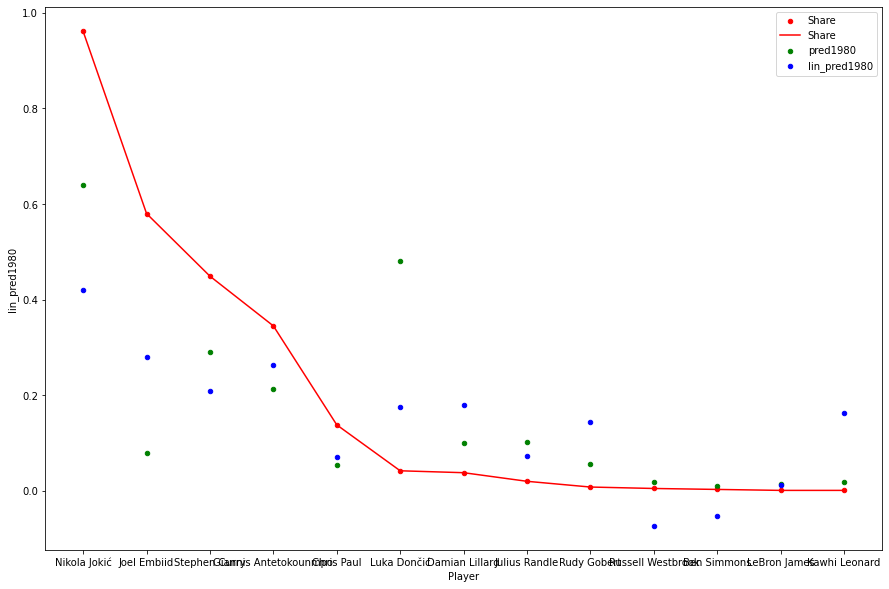

In [34]:
plt.rcParams["figure.figsize"] = (15,10)

ax1 = temp.plot(kind = 'scatter', x = 'Player', y = 'Share', color = 'red')
ax11 = temp.plot(kind = 'line', x = 'Player', y = 'Share', color = 'red', ax=ax1)
ax2 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred1980',color = 'green', ax= ax1)
ax3 = temp.plot(kind = 'scatter', x = 'Player', y = 'lin_pred1980', color = 'blue', ax=ax1)
plt.legend(["Share","Share","pred1980","lin_pred1980"])

#### 2000 - 2021

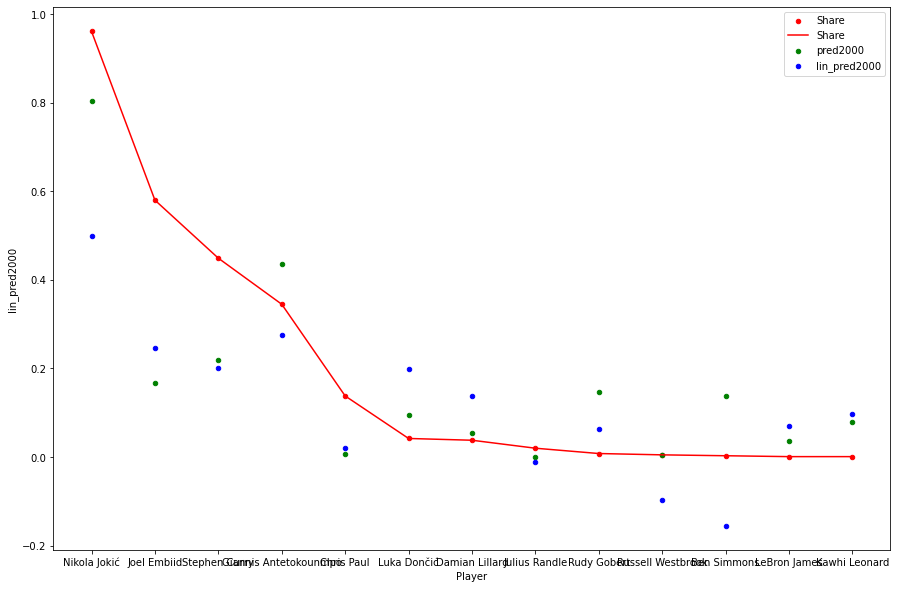

In [35]:
ax1 = temp.plot(kind = 'scatter', x = 'Player', y = 'Share', color = 'red')
ax11 = temp.plot(kind = 'line', x = 'Player', y = 'Share', color = 'red', ax=ax1)
ax2 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred2000',color = 'green', ax= ax1)
ax3 = temp.plot(kind = 'scatter', x = 'Player', y = 'lin_pred2000', color = 'blue', ax=ax1)
plt.legend(["Share","Share","pred2000","lin_pred2000"])

#### 2010 - 2021

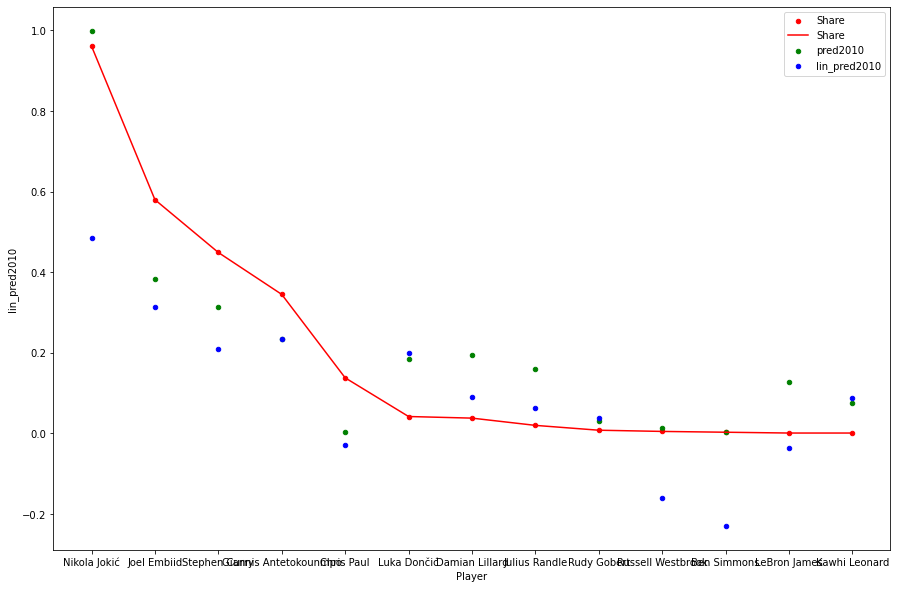

In [36]:
ax1 = temp.plot(kind = 'scatter', x = 'Player', y = 'Share', color = 'red')
ax11 = temp.plot(kind = 'line', x = 'Player', y = 'Share', color = 'red', ax=ax1)
ax2 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred2010',color = 'green', ax= ax1)
ax3 = temp.plot(kind = 'scatter', x = 'Player', y = 'lin_pred2010', color = 'blue', ax=ax1)
plt.legend(["Share","Share","pred2010","lin_pred2010"])

## Model Performance and Results

In [55]:
print("rmse_lin_1980 = ", rmse_lin_1980, "\n" "rmse_xg_1980 = ", rmse_xg_1980, "\n" "rmse_lin_2000 = ", rmse_lin_2000, "\n" "rmse_xg_2000 = " , rmse_xg_2000, "\n""rmse_lin_2010 = ", rmse_lin_2010, "\n" "rmse_xg_2010 = ", rmse_xg_2010) 

rmse_lin_1980 =  0.20487969739768014 
rmse_xg_1980 =  0.21653097089122877 
rmse_lin_2000 =  0.19481806394304563 
rmse_xg_2000 =  0.15713556090702657 
rmse_lin_2010 =  0.19890782878203903 
rmse_xg_2010 =  0.115997345942922


The model we prefer to use in the dataset is XGboost than linear regression because XGboost generally fit training data much better than linear regression. And after generating the root mean square deviation, we found out in 2010 has the lowest root mean square deviation, thus it is better than the other 1980 and 2000.

We decided to use RSME because it works really well for regression and xgboost models


### Comparing which XGBoost year works best

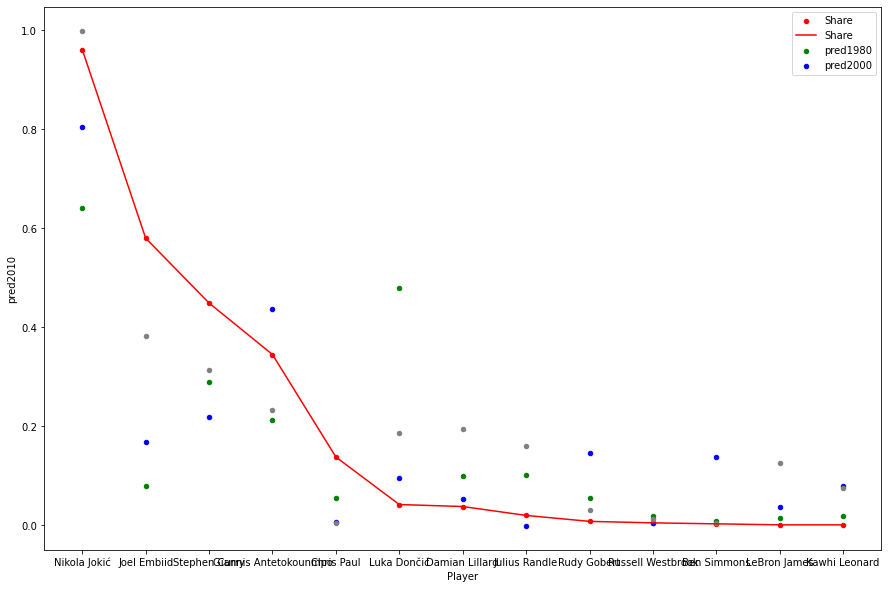

In [53]:
plt.rcParams["figure.figsize"] = (15,10)

ax1 = temp.plot(kind = 'scatter', x = 'Player', y = 'Share', color = 'red')
ax11 = temp.plot(kind = 'line', x = 'Player', y = 'Share',color = 'red', ax= ax1)
ax2 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred1980', color = 'green', ax=ax1)
ax3 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred2000', color = 'blue',ax=ax1)
ax4 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred2010', color = 'grey',ax=ax1)
plt.legend(["Share","Share","pred1980","pred2000"])

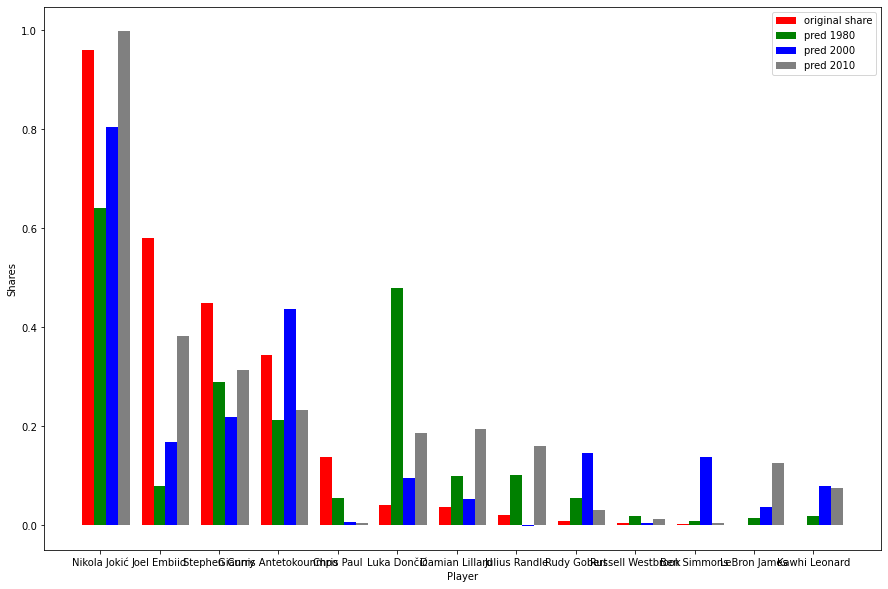

In [54]:
barwidth = 0.20
br1 = np.arange(len(temp['Player']))
br2 = [x + barwidth for x in br1]
br3 = [x + barwidth for x in br2]
br4 = [x + barwidth for x in br3]

plt.bar(br1,temp['Share'],color = 'r', width = barwidth, label = "original share")
plt.bar(br2,temp['pred1980'],color = 'g', width = barwidth, label = "pred 1980")
plt.bar(br3,temp['pred2000'],color = 'b', width = barwidth, label = "pred 2000")
plt.bar(br4,temp['pred2010'],color = 'grey', width = barwidth, label = "pred 2010")

plt.xlabel("Player")
plt.ylabel("Shares")

plt.xticks([r + barwidth for r in range(len(temp))],
           list(temp['Player']))
plt.legend()

# Model performance and results

#### Using RSME to see perfomance since it works well for xgboost and regression models

In [ ]:
print("rmse_lin_1980 = ", rmse_lin_1980, "\n" "rmse_xg_1980 = ", rmse_xg_1980, "\n" "rmse_lin_2000 = ", rmse_lin_2000, "\n" "rmse_xg_2000 = " , rmse_xg_2000, "\n""rmse_lin_2010 = ", rmse_lin_2010, "\n" "rmse_xg_2010 = ", rmse_xg_2010) 

##### After looking at the graphs and calculating the rsme we see that data from 2010- 2021 works the best. This is probably because the criteria people use to vote for MVPs have changed over time and stuff from 1980 and 2000 are outdated and do not apply to current voting standards, which is why data after 2010 works the best
